# Postprocess SWAT Simulations (3) - View Watershed with GeoPandas, PySAL and folium

In this notebook, we'll visualize the SWAT watershed using GeoPandas and its interactions with other Python libraries such as PySAL and folium to produce fancy maps. These packages will also be applied in the following tutorials. Do not walk away. Will be right back after massage :). 

[GeoPandas](http://geopandas.org/) is an open source project to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. 

[PySAL](http://pysal.readthedocs.io/en/latest/) is an open source library of spatial analysis functions written in Python intended to support the development of high level applications.

[Folium](http://python-visualization.github.io/folium/) builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

*It is worth noting that all data in this series are fake data and only are used to show how to postprocess SWAT simulations through open source tools.*

## 1. Load all needed libraries

In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Read Watershed map

### 2.1 Read shapefile into a geo-dataframe

In [2]:
geo_df = gpd.read_file("data\Watersheds\subs1.shp")
geo_df.set_index(geo_df["Subbasin"].astype(int), inplace=True)

### 2.2 Projection transformation

You can try different projections such as 2163 (albers), 3857 (web), 4269 (plate). Here 4269 is used, which uses a latitude and longitude coordinates.

In [3]:
print(geo_df.crs)

geo_df_ll = geo_df.to_crs(epsg=4269)
geo_df_ll.head()

{u'lon_0': 105, u'datum': u'WGS84', u'y_0': 0, u'no_defs': True, u'proj': u'lcc', u'x_0': 0, u'units': u'm', u'lat_2': 62, u'lat_1': 30, u'lat_0': 0}


,OBJECTID,GRIDCODE,Subbasin,Area,Slo1,Len1,Sll,Csl,Wid1,Dep1,...,Long_,Elev,ElevMin,ElevMax,Bname,Shape_Leng,Shape_Area,HydroID,OutletID,geometry
Subbasin,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,675995.835055,23.175461,180463.680407,15.239256,1.706715,256.186430,4.425078,...,70.646312,2886.131934,1176.0,5184.0,,628216.7982,6.759958e+09,300001,100001,"POLYGON ((71.4325946919343 39.03757777443316, ..."
2,2,2,2,790745.086365,14.554012,231915.147016,24.382810,0.919733,281.456713,4.711487,...,72.533122,3525.776417,1860.0,6888.0,,704621.5446,7.907451e+09,300002,100003,(POLYGON ((71.43239258464315 39.27589332090621...
3,3,3,3,606966.108813,22.861181,217542.399986,15.239256,1.875496,240.153199,4.238470,...,71.092978,3375.708720,1206.0,6882.0,,594259.1332,6.069661e+09,300003,100002,"POLYGON ((70.4782047733714 38.53995060142422, ..."
4,4,4,4,640523.789765,25.315536,175748.180259,15.239256,2.786373,248.033801,4.330694,...,72.300945,4423.062764,1879.0,6933.0,,647317.9856,6.405238e+09,300004,100004,"POLYGON ((72.36129129121389 38.49959671932704,..."
5,5,5,5,891755.958326,8.936497,301470.209320,60.957025,0.781172,302.508319,4.943582,...,68.995483,956.192070,323.0,3741.0,,808616.8932,8.917560e+09,300005,100005,"POLYGON ((68.37380541847237 37.20330558973374,..."


### 2.3 Make a new column called coordinates, which is based on the “geometry” column

In [4]:
geo_df_ll['coords'] = geo_df_ll['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_df_ll['coords'] = [coords[0] for coords in geo_df_ll['coords']]

geo_df_ll.head()

,OBJECTID,GRIDCODE,Subbasin,Area,Slo1,Len1,Sll,Csl,Wid1,Dep1,...,Elev,ElevMin,ElevMax,Bname,Shape_Leng,Shape_Area,HydroID,OutletID,geometry,coords
Subbasin,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,675995.835055,23.175461,180463.680407,15.239256,1.706715,256.186430,4.425078,...,2886.131934,1176.0,5184.0,,628216.7982,6.759958e+09,300001,100001,"POLYGON ((71.4325946919343 39.03757777443316, ...","(70.5453857151, 39.2361201273)"
2,2,2,2,790745.086365,14.554012,231915.147016,24.382810,0.919733,281.456713,4.711487,...,3525.776417,1860.0,6888.0,,704621.5446,7.907451e+09,300002,100003,(POLYGON ((71.43239258464315 39.27589332090621...,"(72.5714038856, 39.5302945975)"
3,3,3,3,606966.108813,22.861181,217542.399986,15.239256,1.875496,240.153199,4.238470,...,3375.708720,1206.0,6882.0,,594259.1332,6.069661e+09,300003,100002,"POLYGON ((70.4782047733714 38.53995060142422, ...","(71.5212703872, 38.7950837097)"
4,4,4,4,640523.789765,25.315536,175748.180259,15.239256,2.786373,248.033801,4.330694,...,4423.062764,1879.0,6933.0,,647317.9856,6.405238e+09,300004,100004,"POLYGON ((72.36129129121389 38.49959671932704,...","(72.5097616139, 38.9435426829)"
5,5,5,5,891755.958326,8.936497,301470.209320,60.957025,0.781172,302.508319,4.943582,...,956.192070,323.0,3741.0,,808616.8932,8.917560e+09,300005,100005,"POLYGON ((68.37380541847237 37.20330558973374,...","(68.8409226722, 38.1089746734)"


## 3. Plot spatial map and label the subbasins

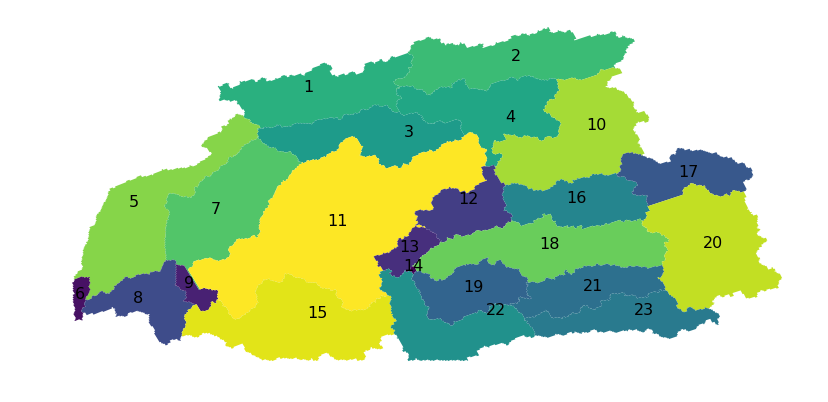

In [5]:
ax = geo_df_ll.plot(column='Area', cmap='viridis', categorical=True, figsize=(14, 7))
ax.set_axis_off()
for idx, row in geo_df_ll.iterrows():    
    plt.annotate(s=row['Subbasin'], xy=row['coords'], fontsize=16, horizontalalignment='center')

## 4. Classify watershed based on area using PySAL

Here we classify the watershed based on its area. PySAL consists of several classification schemes for choropleth mapping. The default for “scheme” is quantiles. You can also use “equal_interval” or “fisher_jenks”. Fisher_jenks sets categories by minimizing in-group variance and maximizing inter-group variance.

In [6]:
import pysal

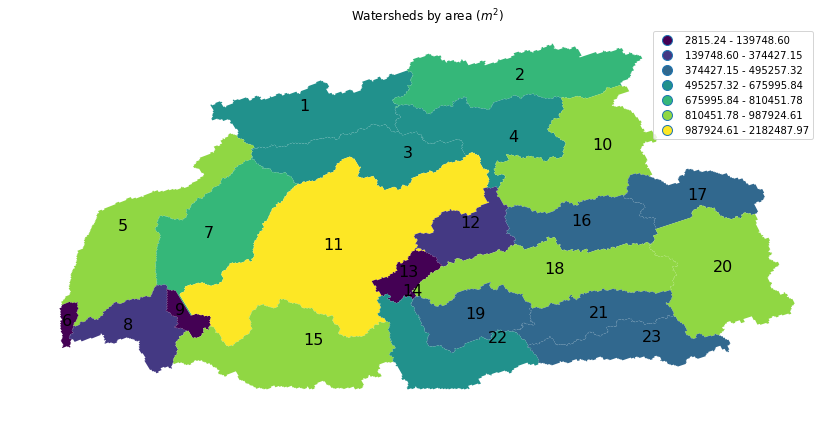

In [7]:
f, ax = plt.subplots(1, figsize = (14, 7))
ax.set_title('Watersheds by area ($m^2$)')
geo_df_ll.plot(ax=ax,
               column='Area', 
               scheme='fisher_jenks', 
               k=7, 
               #cmap=plt.cm.Blues, 
               legend=True,
               linewidth = 0.5)
ax.set_axis_off()
for idx, row in geo_df_ll.iterrows():    
    plt.annotate(s=row['Subbasin'], xy=row['coords'], fontsize=16, horizontalalignment='center')
plt.axis('equal');

## 5. Interactive map with folium

In [8]:
import folium

In [9]:
m = folium.Map(location=[38, 72], zoom_start=7, tiles="Stamen Terrain",)

m.choropleth(
    geo_data=geo_df_ll,
    data=geo_df_ll,
    columns=['Subbasin', 'Area'],
    key_on='feature.properties.Subbasin',
    legend_name='Area(sq.m)', 
    fill_color='BuPu',
    fill_opacity=0.4,
    highlight=True)

m

## References

Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)

Rey, Sergio J. (2012) PySAL: A Python Library for Exploratory Spatial Data Analysis and Geocomputation (Movie) SciPy 2012.

Rey, Sergio J. and Luc Anselin. (2010) PySAL: A Python Library of Spatial Analytical Methods. In M. Fischer and A. Getis (eds.) Handbook of Applied Spatial Analysis: Software Tools, Methods and Applications. Springer, Berlin.

Rey, Sergio J. (2009). Show Me the Code: Spatial Analysis and Open Source. Journal of Geographical Systems 11: 191-2007.

http://geopandas.org/

http://python-visualization.github.io/folium/